# María José Fonseca Vázquez#

## 1.- Límite lineal. Considerando ángulos pequeños, tenemos la ecuación lineal forzada y amortiguada vista en clase, cuya solución particular (aquella que domina a tiempos grandes) tiene una función Coseno con una cierta amplitud y fase dada en términos de los parametros de la ecuación anterior. Tomando $$A=1,$$ $$\omega_0=1$$ $$\mu_0=0.05:$$ ###

### a) Graficar la Amplitud como función de la frecuencia de la fuerza externa. ¿Existe alguna resonancia? ###

La ecuación diferencial que corresponde al péndulo forzado amortiguado es $$\ddot \theta + \mu \dot\theta + \omega_0^2 sin \theta = A cos (wt)$$

Se puede expresar también de la siguiente manera: 
$$ \ddot x + \frac{b}{m} \dot x + \frac{k}{m} x = F cos(\omega t) $$
$$\ddot x + 2 \beta \dot x + \omega_0^2 x = A cos(\omega t)$$

Entonces $\beta =\frac{b}{2m}= \frac{\mu}{2}$, $\omega_0^2 = \frac{k}{m}$ y $A = \frac{F}{m}$

La solución particular del péndulo forzado amortiguado es la siguiente: $$x_p(t) = \frac{A}{\sqrt((\omega_0^2-\omega^2)^2 + 4   \omega^2 \beta^2)} cos(\omega t - \delta)$$

La amplitud corresponde a $\frac{A}{\sqrt((\omega_0^2-\omega^2)^2 + 4   \omega^2 \beta^2)}$, mientras que la fase corresponde a $\delta$, donde $$\delta = tan^{-1} (\frac{2 \omega \beta}{\omega_0^2-\omega^2})$$

La frecuencia de resonancia está definida como $$\omega_R = \sqrt(\omega_0^2 - \beta^2)$$ Con $\omega_0 = 1$ y $\mu_0 = 0.05$, $$\omega_R = \sqrt(1^2 - (\frac{0.05}{2})^2) \sim 1$$ 


In [30]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

<function matplotlib.pyplot.show(*args, **kw)>

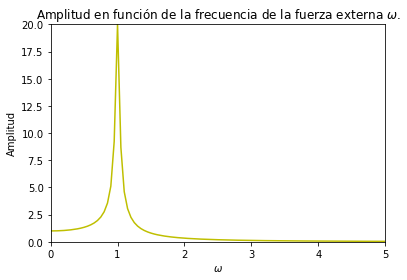

In [31]:
A = 1
OMEGA = 1
MIU = 0.05
BETA = MIU / 2

def AMPLITUDE(w):
    return A / math.sqrt(math.pow((math.pow(OMEGA, 2) - math.pow(w, 2)), 2) + 4 * math.pow(w, 2) * math.pow(BETA, 2))

#Archivo de texto con la tabulación 
f = open("Ejercicio1a.txt", "w+")
i = 0
while i < 30 :
    f.write(str(i) + '\t' + str(AMPLITUDE(i)) + '\n')
    i += 0.05
f.close()

#Graficar
x, y = np.loadtxt('Ejercicio1a.txt', delimiter = '\t', unpack = True)
plt.plot(x , y, 'y')
plt.rcParams['figure.figsize'] = (25, 4)
plt.title('Amplitud en función de la frecuencia de la fuerza externa $\omega$.')
plt.ylabel('Amplitud')
plt.xlabel('$\omega$')
plt.ylim(0, 20)
plt.xlim(0, 5)
plt.show

### b) Graficar la Fase de la solución como función de la frecuencia de la fuerza externa.



Se espera obtener una asíntota para $\omega = 1$, ya que el denominador de la frecuencia es igual a cero en dicho valor.

<function matplotlib.pyplot.show(*args, **kw)>

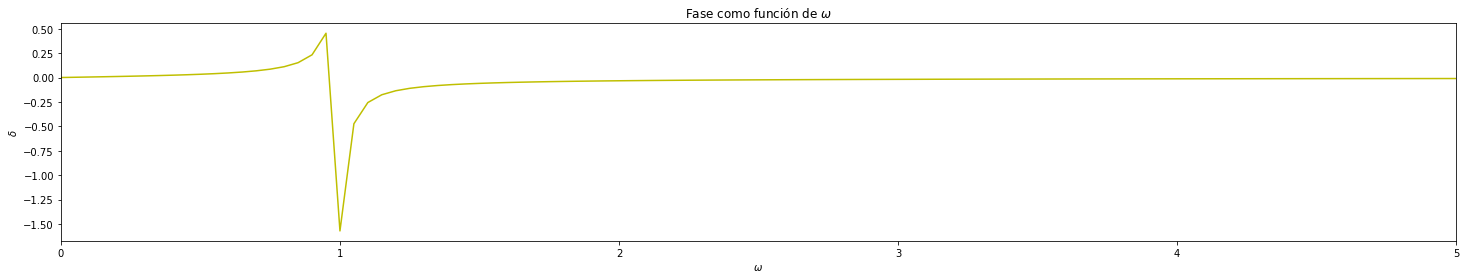

In [32]:
def DELTA(w):
    return math.atan(2 * w * BETA / (math.pow(OMEGA, 2) - math.pow(w, 2)))

f = open("Ejercicio1b.txt", "w+")
i = 0
while i < 150 :
    f.write(str(i) + '\t' + str(math.degrees((math.radians(DELTA(i))))) + '\n')
    i += 0.05
f.close()

x, y = np.loadtxt('Ejercicio1b.txt', delimiter = '\t', unpack = True)
plt.plot(x , y, 'y')
plt.title('Fase como función de $\omega$')
plt.xlim(0, 5)
plt.ylabel('$\delta$')
plt.xlabel('$\omega$')
plt.show

### c) Graficar el ángulo y la velocidad angular como función del tiempo para 2 condiciones iniciales distintas.

Se eligieron las dos condiciones iniciales distintas y se graficaron tres soluciones: particular, homogénea y completa en base a dichas condiciones. Cabe señalar que ÚNICAMENTE SE PEDÍA GRAFICAR LA SOLUCIÓN PARTICULAR, pero las otras dos soluciones se muestran para complementar el análisis.

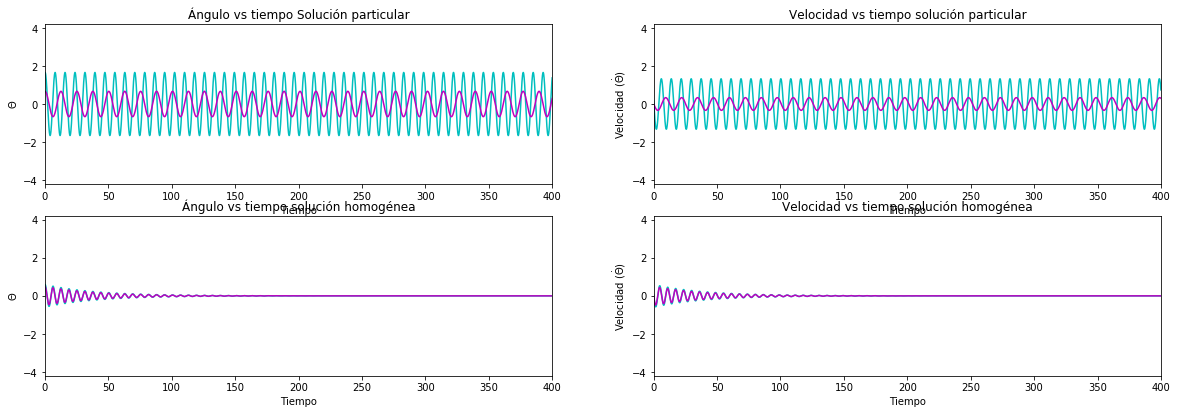

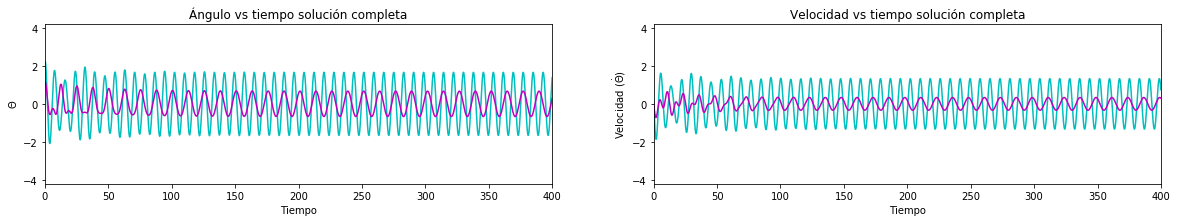

In [33]:
A_1 = 0.6
W_1 = 0.8
A_2 = 0.5
W_2 = 0.5
OMEGA_0 = 1
w_1 = math.sqrt(math.pow(OMEGA_0, 2) - math.pow(BETA, 2))

def DELTA(w, t):
    return math.atan(2 * w * BETA / (math.pow(OMEGA_0, 2) - math.pow(w, 2)))

def ANGLE_HOM(A, W, t):
    return A * math.exp(-BETA * t) * math.cos(w_1 * t - DELTA(W, t))

def VELOCITY_HOM(A, W, t):
    return -A * math.exp(-BETA * t) * (BETA * math.cos(w_1 * t -DELTA(W, t)) + w_1 * math.sin(w_1 * t - DELTA(W, t))) 

def ANGLE_PART(A, W, t):
    return A * math.cos(W * t - DELTA(W, t)) / math.sqrt(math.pow((math.pow(OMEGA_0, 2) - math.pow(W, 2)), 2) + 4 * math.pow(W, 2) * math.pow(BETA, 2))

def VELOCITY_PART(A, W, t):
    return -A * W * math.sin(W * t - DELTA(W, t)) / math.sqrt(math.pow((math.pow(OMEGA_0, 2) - math.pow(W, 2)), 2) + 4 * math.pow(W, 2) * math.pow(BETA, 2))

def ANGLE_TOTAL(A, W, t):
    return ANGLE_HOM(A, W, t) + ANGLE_PART(A, W, t)

def VELOCITY_TOTAL(A, W, t):
    return VELOCITY_HOM(A, W, t) + VELOCITY_PART(A, W, t)

f = open("Ejercicio1c_hom.txt", "w+")
i = 0
while i < 400 :
    f.write(str(i) + '\t' + str(ANGLE_HOM(A_1, W_1, i)) + '\t' + str(VELOCITY_HOM(A_1, W_1, i)) + 
    '\t' + str(ANGLE_HOM(A_2, W_2, i)) + '\t' + str(VELOCITY_HOM(A_2, W_2, i)) + '\n')
    i += 0.05

f = open("Ejercicio1c_part.txt", "w+")
i = 0
while i < 400 :
    f.write(str(i) + '\t' + str(ANGLE_PART(A_1, W_1, i)) + '\t' + str(VELOCITY_PART(A_1, W_1, i)) + 
    '\t' + str(ANGLE_PART(A_2, W_2, i)) + '\t' + str(VELOCITY_PART(A_2, W_2, i)) + '\n')
    i += 0.05

f = open("Ejercicio1c_total.txt", "w+")
i = 0
while i < 400 :
    f.write(str(i) + '\t' + str(ANGLE_TOTAL(A_1, W_1, i)) + '\t' + str(VELOCITY_TOTAL(A_1, W_1, i)) + 
    '\t' + str(ANGLE_TOTAL(A_2, W_2, i)) + '\t' + str(VELOCITY_TOTAL(A_2, W_2, i)) + '\n')
    i += 0.05

f.close()

#Gráficas
th, a_1h, v_1h, a_2h, v_2h = np.loadtxt('Ejercicio1c_hom.txt', delimiter = '\t', unpack = True)
tp, a_1p, v_1p, a_2p, v_2p = np.loadtxt('Ejercicio1c_part.txt', delimiter = '\t', unpack = True)
tt, a_1t, v_1t, a_2t, v_2t = np.loadtxt('Ejercicio1c_total.txt', delimiter = '\t', unpack = True)

plt.figure(figsize=(20,10))

plt.subplot(3, 2, 1)
plt.plot(tp, a_1p, 'c', tp, a_2p, 'm')
plt.title('Ángulo vs tiempo Solución particular')
plt.ylim(-4.2, 4.2)
plt.xlim(0, 400)
plt.ylabel('$\Theta$')
plt.xlabel('Tiempo')


plt.subplot(3, 2, 2)
plt.plot(tp , v_1p, 'c', tp, v_2p, 'm')
plt.title('Velocidad vs tiempo solución particular')
plt.ylim(-4.2, 4.2)
plt.xlim(0, 400)
plt.ylabel('Velocidad ($\dot\Theta$)')
plt.xlabel('Tiempo')

plt.subplot(3, 2, 3)
plt.plot(th , a_1h, 'c', th, a_2h, 'm')
plt.title('Ángulo vs tiempo solución homogénea')
plt.ylim(-4.2, 4.2)
plt.xlim(0, 400)
plt.ylabel('$\Theta$')
plt.xlabel('Tiempo')

plt.subplot(3, 2, 4)
plt.plot(th , v_1h, 'c', th, v_2h, 'm')
plt.title('Velocidad vs tiempo solución homogénea')
plt.ylim(-4.2, 4.2)
plt.xlim(0, 400)
plt.ylabel('Velocidad ($\dot\Theta$)')
plt.xlabel('Tiempo')


plt.figure(figsize=(20,10))
plt.subplot(3, 2, 5)
plt.plot(tt, a_1t, 'c', tt, a_2t, 'm')
plt.title('Ángulo vs tiempo solución completa')
plt.ylim(-4.2, 4.2)
plt.xlim(0, 400)
plt.ylabel('$\Theta$')
plt.xlabel('Tiempo')

plt.subplot(3, 2, 6)
plt.plot(tt, v_1t, 'c', tt, v_2t, 'm')
plt.title('Velocidad vs tiempo solución completa')
plt.ylim(-4.2, 4.2)
plt.xlim(0, 400)
plt.ylabel('Velocidad ($\dot\Theta$)')
plt.xlabel('Tiempo')

plt.show()

### d) Graficar en el espacio fase las 2 trayectorias con condiciones iniciales distintas del inciso anterior.

Nuevamente, se muestran los espacios-fase para las tres soluciones. Para la solución homogénea, el espacio fase que se espera obtener es una espiral que vaya acercándose al origen, ya que es una exponencial decayente, mientras que para la homogénea se espera obtener círculos o elipses, debido a que es una función que oscila y no decrece. 

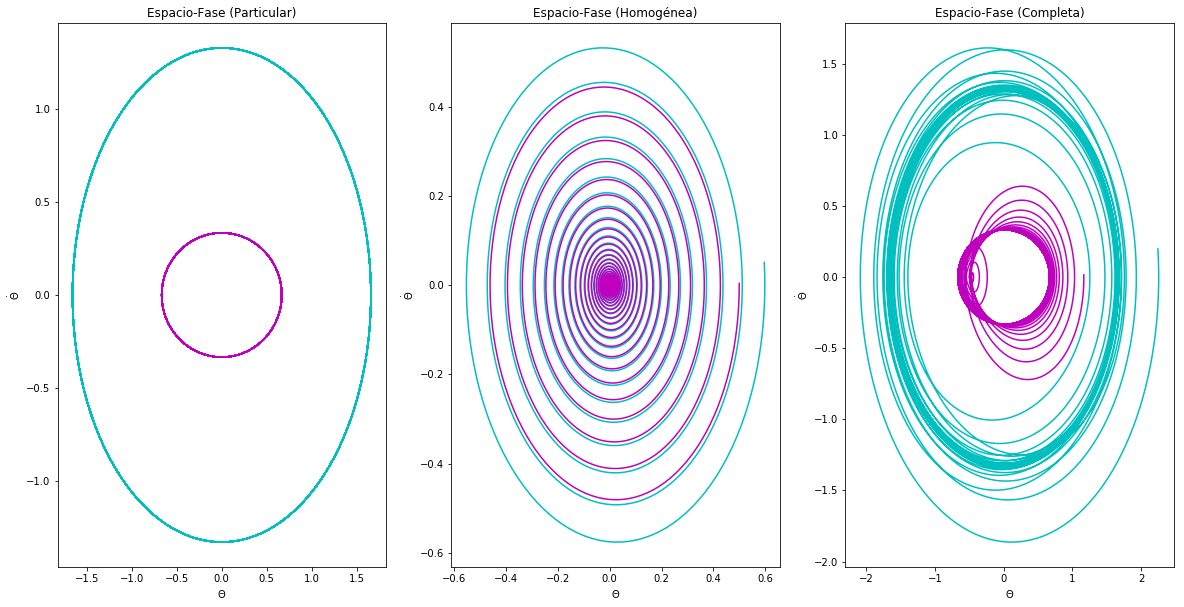

In [34]:
f = open("Ejercicio1d.txt", "w+")
i = 0
while i < 400 :
    f.write(str(i) + '\t' + str(ANGLE_PART(A_1, W_1, i)) + '\t' + str(VELOCITY_PART(A_1, W_1, i)) + 
    '\t' + str(ANGLE_PART(A_2, W_2, i)) + '\t' + str(VELOCITY_PART(A_2, W_2, i)) + '\n')
    i += 0.05

g = open("Ejercicio1dtotal.txt", "w+")
i = 0
while i < 400 :
    g.write(str(i) + '\t' + str(ANGLE_TOTAL(A_1, W_1, i)) + '\t' + str(VELOCITY_TOTAL(A_1, W_1, i)) + 
    '\t' + str(ANGLE_TOTAL(A_2, W_2, i)) + '\t' + str(VELOCITY_TOTAL(A_2, W_2, i)) + '\n')
    i += 0.05

h = open("Ejercicio1dhom.txt", "w+")
i = 0
while i < 400 :
    h.write(str(i) + '\t' + str(ANGLE_HOM(A_1, W_1, i)) + '\t' + str(VELOCITY_HOM(A_1, W_1, i)) + 
    '\t' + str(ANGLE_HOM(A_2, W_2, i)) + '\t' + str(VELOCITY_HOM(A_2, W_2, i)) + '\n')
    i += 0.05
    
    
f.close()
g.close()
h.close()

t, a_1, v_1, a_2, v_2 = np.loadtxt('Ejercicio1d.txt', delimiter = '\t', unpack = True)
tt, at_1, vt_1, at_2, vt_2 = np.loadtxt('Ejercicio1dtotal.txt', delimiter = '\t', unpack = True)
th, ah_1, vh_1, ah_2, vh_2 = np.loadtxt('Ejercicio1dhom.txt', delimiter = '\t', unpack = True)

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.plot(a_1, v_1, 'c', a_2, v_2, 'm')
plt.title('Espacio-Fase (Particular)')
#plt.ylim(-3.5, 3.5)
#plt.xlim(-3.5, 3.5)
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')


plt.subplot(1, 3, 2)
plt.plot(ah_1, vh_1, 'c', ah_2, vh_2, 'm')
plt.title('Espacio-Fase (Homogénea)')
#plt.ylim(-1, 1)
#plt.xlim(-4, 4)
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')

plt.subplot(1, 3, 3)
plt.plot(at_1, vt_1, 'c', at_2, vt_2, 'm')
plt.title('Espacio-Fase (Completa)')
#plt.ylim(-1, 1)
#plt.xlim(-4, 4)
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')

plt.show()

### e) Graficar en el espacio fase 2 trayectorias con dos $A$ distintas, $\mu = 0$ y la misma condición inicial.

Ahora se grafica únicamente el espacio fase de las soluciones homogénea y particular. Al no haber amortiguamiento, en los espacios-fase que se mostrarán no se espera observar convergencia hacia algún punto.

<function matplotlib.pyplot.show(*args, **kw)>

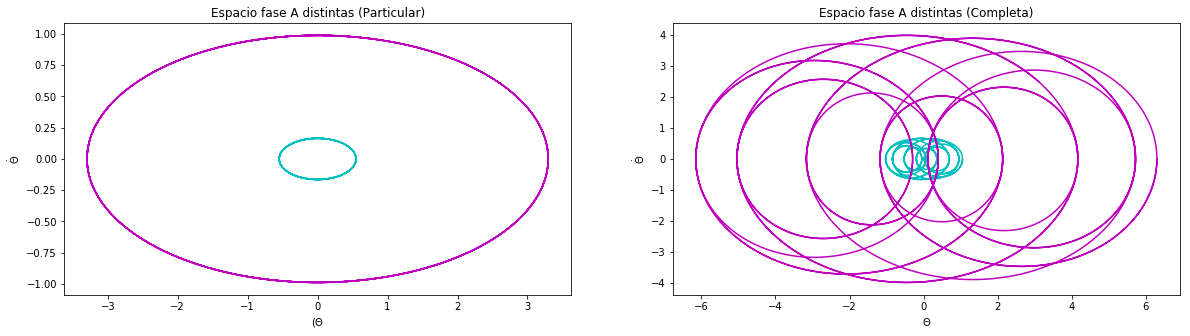

In [45]:
MIU = 0
A_1 = 0.5
A_2 = 3
BETA = MIU / 2
OMEGA_0 = 1
w = 0.3
w_1 = math.sqrt(math.pow(OMEGA_0, 2) - math.pow(BETA, 2))

def DELTA(t):
    return math.atan(2 * w * BETA / (math.pow(OMEGA_0, 2) - math.pow(w, 2)))

def ANGLE_HOM(A, t):
    return A * math.exp(-BETA * t) * math.cos(w_1 * t - DELTA(t))

def VELOCITY_HOM(A, t):
    return -A * math.exp(-BETA * t) * (BETA * math.cos(w_1 * t -DELTA(t)) + w_1 * math.sin(w_1 * t - DELTA(t))) 

def ANGLE_PART(A, t):
    return A * math.cos(w * t - DELTA(t)) / math.sqrt(math.pow((math.pow(OMEGA_0, 2) - math.pow(w, 2)), 2) + 4 * math.pow(w, 2) * math.pow(BETA, 2))

def VELOCITY_PART(A, t):
    return -A * w * math.sin(w * t - DELTA(t)) / math.sqrt(math.pow((math.pow(OMEGA_0, 2) - math.pow(w, 2)), 2) + 4 * math.pow(w, 2) * math.pow(BETA, 2))

def ANGLE_TOTAL(A, t):
    return ANGLE_HOM(A, t) + ANGLE_PART(A, t)

def VELOCITY_TOTAL(A, t):
    return VELOCITY_HOM(A, t) + VELOCITY_PART(A, t)

f = open("Ejercicio1e.txt", "w+")
i = 0

while i < 100 :
    f.write(str(ANGLE_PART(A_1, i)) + '\t' + str(VELOCITY_PART(A_1, i)) + 
    '\t' + str(ANGLE_PART(A_2, i)) + '\t' + str(VELOCITY_PART(A_2, i)) + '\n')
    i += 0.05

g = open("Ejercicio1etotal.txt", "w+")
i = 0

while i < 100 :
    g.write(str(ANGLE_TOTAL(A_1, i)) + '\t' + str(VELOCITY_TOTAL(A_1, i)) + 
    '\t' + str(ANGLE_TOTAL(A_2, i)) + '\t' + str(VELOCITY_TOTAL(A_2, i)) + '\n')
    i += 0.05
    
f.close()
g.close()

a_1, v_1, a_2, v_2 = np.loadtxt('Ejercicio1e.txt', delimiter = '\t', unpack = True)
at_1, vt_1, at_2, vt_2 = np.loadtxt('Ejercicio1etotal.txt', delimiter = '\t', unpack = True)


plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(a_1 , v_1, 'c', a_2, v_2, 'm')
plt.title('Espacio fase A distintas (Particular)')
plt.ylabel('$\dot\Theta$')
plt.xlabel('($\Theta$')
#plt.ylim(-4.1, 4.1)
#plt.xlim(-8, 8)

plt.subplot(1, 2, 2)
plt.plot(at_1 , vt_1, 'c', at_2, vt_2, 'm')
plt.title('Espacio fase A distintas (Completa)')
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')


plt.show

### f) Graficar en el espacio fase 2 trayectorias con $\mu = 0, 2.0, 0.1$ para la misma amplitud (A=1) y la misma confición inicial.

Para este caso, el único parámetro variante en la solución particular es $\mu$. Debido a ello, se espera obtener el espacio fase de las trayectorias con $\mu = 0$ y $\mu = 0.1$ superpuestas, ed decir, en la solución homogénea sólo se espera ver dos elipses en vez de tres.

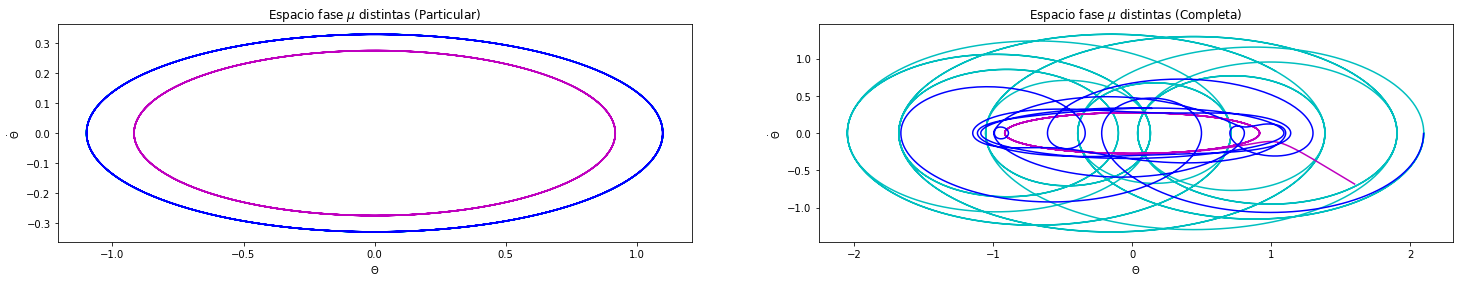

In [46]:
MIU_1 = 0
MIU_2 = 2
MIU_3= 0.1
A = 1
OMEGA_0 = 1
w = 0.3

def w_1(m):
    return math.sqrt(math.pow(OMEGA_0, 2) - math.pow(BETA(m), 2))

def BETA(MIU):
    return MIU / 2

def DELTA(m, t):
    return math.atan(2 * w * BETA(m) / (math.pow(OMEGA_0, 2) - math.pow(w, 2)))

def ANGLE_HOM(m, t):
    return A * math.exp(-BETA(m) * t) * math.cos(w_1(m) * t - DELTA(m, t))

def VELOCITY_HOM(m, t):
    return -A * math.exp(-BETA(m) * t) * (BETA(m) * math.cos(w_1(m) * t -DELTA(m, t)) + w_1(m) * math.sin(w_1(m) * t - DELTA(m, t))) 

def ANGLE_PART(m, t):
    return A * math.cos(w * t - DELTA(m, t)) / math.sqrt(math.pow((math.pow(OMEGA_0, 2) - math.pow(w, 2)), 2) + 4 * math.pow(w, 2) * math.pow(BETA(m), 2))

def VELOCITY_PART(m, t):
    return -A * w * math.sin(w * t - DELTA(m, t)) / math.sqrt(math.pow((math.pow(OMEGA_0, 2) - math.pow(w, 2)), 2) + 4 * math.pow(w, 2) * math.pow(BETA(m), 2))

def ANGLE_TOTAL(m, t):
    return ANGLE_HOM(m, t) + ANGLE_PART(m, t)

def VELOCITY_TOTAL(m, t):
    return VELOCITY_HOM(m, t) + VELOCITY_PART(m, t)

f = open("Ejercicio1ftotal.txt", "w+")
i = 0

while i < 100 :
    f.write(str(ANGLE_TOTAL(MIU_1, i)) + '\t' + str(VELOCITY_TOTAL(MIU_1, i)) + 
    '\t' + str(ANGLE_TOTAL(MIU_2, i)) + '\t' + str(VELOCITY_TOTAL(MIU_2, i)) + '\t' 
    + str(ANGLE_TOTAL(MIU_3, i)) + '\t' + str(VELOCITY_TOTAL(MIU_3, i)) +'\n')
    i += 0.05
    
h = open("Ejercicio1fpart.txt", "w+")
k = 0
    
while k < 100 :
    h.write(str(ANGLE_PART(MIU_1, k)) + '\t' + str(VELOCITY_PART(MIU_1, k)) + 
    '\t' + str(ANGLE_PART(MIU_2, k)) + '\t' + str(VELOCITY_PART(MIU_2, k)) + '\t' 
    + str(ANGLE_PART(MIU_3, k)) + '\t' + str(VELOCITY_PART(MIU_3, k)) +'\n')
    k += 0.05    

    
f.close()
h.close()

#Gráficas
xp_1, vp_1, xp_2, vp_2, xp_3, vp_3 = np.loadtxt('Ejercicio1fpart.txt', delimiter = '\t', unpack = True)
xt_1, vt_1, xt_2, vt_2, xt_3, vt_3 = np.loadtxt('Ejercicio1ftotal.txt', delimiter = '\t', unpack = True)

plt.subplot(1, 2, 1)
plt.plot(xp_1 , vp_1, 'c', xp_2, vp_2, 'm', xp_3, vp_3, 'b')
plt.title('Espacio fase $\mu$ distintas (Particular)')
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')

plt.subplot(1, 2, 2)
plt.plot(xt_1 , vt_1, 'c', xt_2, vt_2, 'm', xt_3, vt_3, 'b')
plt.title('Espacio fase $\mu$ distintas (Completa)')
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')

plt.show()

## Utiliza el módulo de odeint en la libreria scipy (from scipy.integrate import odeint) para encontrar soluciones numéricas en los siguientes problemas.

## 2.- Ecuación no lineal no forzada sin amortiguamiento.



### a) Para un ángulo inicial de 70 grados en reposo y una frecuencia natural unitaria, realiza una gráfica donde compares la solución numérica del ángulo y su velocidad con aquella de la ecuación lineal usando las mismas condiciones iniciales.

La ecuación diferencial completa es: $$\ddot\theta + \mu\dot\theta + \omega_0^2 sin(\theta) = A cos(w_dt)$$ 
Que se puede interpretar como $$Aceleración + Amortiguamiento + Gravedad = F_{externa}$$
Como es una ecuación no forzada, entonces $A cos (w_dt) = 0$, y como no hay amortiguamiento, $\mu = 0$, quedando la ecuación diferencial de la forma  $$\ddot\theta + \omega_0^2 sin(\theta) = 0,$$ o lo que es lo mismo $$\ddot\theta = -\omega_0^2 sin(\theta)$$ 

Para realizar la comparación con la aproximación lineal, se debe recordar que $sin(\theta)$ es aproximadamente $\theta$ para ángulos pequeños, por lo que se define la ecuación lineal como $$\ddot\theta = -\omega_0^2\theta$$ y las mismas condiciones iniciales.

Por otro lado, para poder utilizar la función odeint, la ODE debe ser de primer orden, sin embargo se tiene  una EDO de segundo orden. Por tanto, es necesario realizar un cambio de variable para obtener dos ecuaciones diferenciales de primer orden y poder así encontrar la solución. Ello se logra eligiendo una nueva variable como la primera derivada de $\dot\theta$.

Para este caso, la ecuación para la derivada de $\theta$ (\omega) es $$ \dot\omega = - \omega_0^2 sin(\theta) $$

Es necesario recordar que el ángulo inicial fue dado en grados, mientras que Python opera en radianes, así que debe realizarse la conversión necesaria para que los cálculos sean correctos.

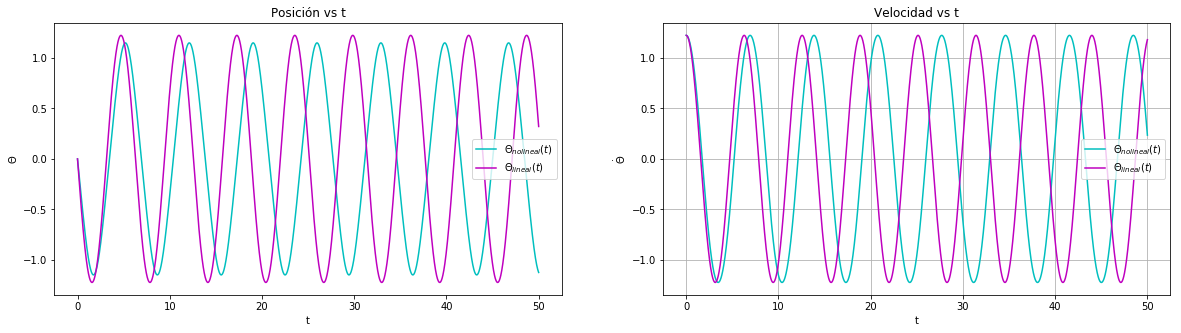

In [48]:
v = 0
w_0 = 1
vector0 = (0, math.radians(70))

def EDO_NL(vector, t, w_0, v):
    (vel_ang, theta) = vector
    dvectordt = (- math.pow(w_0, 2) * math.sin(theta), vel_ang)
    return dvectordt

def EDO_L(vector, t, w_0, v):
    (vel_ang, theta) = vector
    dvectordt = (- math.pow(w_0, 2) * theta, vel_ang)
    return dvectordt



i = np.linspace(0, 50, 5000)
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0,v))
#j = np.linspace(0, 50, 5000)
ecu_lin = odeint(EDO_L, vector0, i, args = (w_0,v))


plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(i, ecu_nl[:, 0], 'c', label='$\Theta_{nolineal}(t)$')
plt.plot(i, ecu_lin[:, 0],'m', label='$\Theta_{lineal}(t)$')
plt.title('Posición vs t')
plt.ylabel('$\Theta$')
plt.xlabel('t')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(i, ecu_nl[:, 1], 'c', label='$\Theta_{nolineal}(t)$')
plt.plot(i, ecu_lin[:, 1],'m', label='$\Theta_{lineal}(t)$')
plt.title('Velocidad vs t')
plt.ylabel('$\dot\Theta$')
plt.xlabel('t')

#Gráfica
plt.legend(loc='best')
plt.grid()
plt.show()


Como era de esperar, conforme se avanza en el tiempo la diferencia entre las soluciones incrementa. Esto es debido a que conforme $t$ incrementa, también lo hace $\theta$, y como la aproximación lineal se cumple para ángulos pequeños, sólo para ellos la aproximación es correcta.

### b) Construye el espacio fase para una frecuencia natural unitaria, usando trayectorias que partan del reposo con un ángulo inicial que vaya de -90 a 90 grados, en intervalos de 10 grados. Suma dos trayectorias que den vueltas, una encontra de las manecillas del reloj y otra a favor.

Se utilizó prácticamente el mismo código que en el inciso anterior. La diferencia notoria es que para los intervalos se implementó el plt.plot dentro de un ciclo while, y para sumar las dos trayectorias se sumó el ángulo opuesto. Se muestran primero los espacios-fase originales:

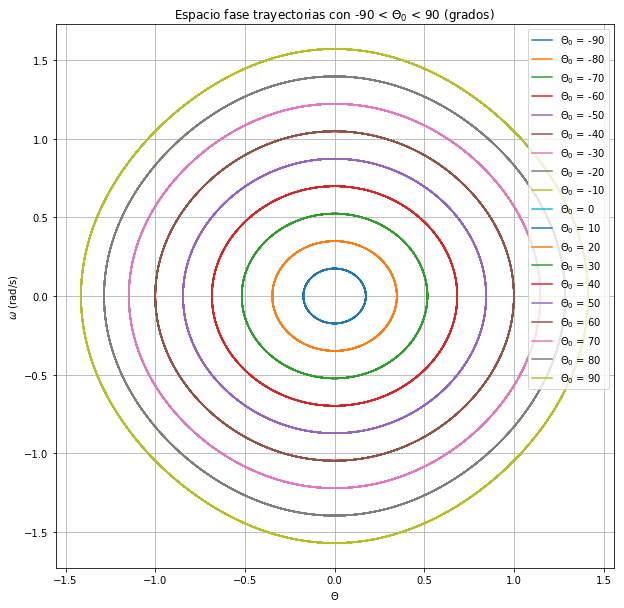

In [54]:
v = 0
w_0 = 1

def vector0(angle): 
    return (0, math.radians(angle))
angle = -90

i = np.linspace(0, 50, 5000)
#j = np.linspace(0, 50, 5000)
    
while angle <= 90:
    
    ecu_nl = odeint(EDO_NL, vector0(angle), i, args = (w_0,v))
    plt.plot(ecu_nl[:, 0], ecu_nl[:, 1], label='$\Theta_0$ = ' + str(angle))
    angle += 10

plt.rcParams['figure.figsize'] = (5, 5)    
plt.title('Espacio fase trayectorias con -90 < $\Theta_0$ < 90 (grados)')    
plt.legend(loc='best')
plt.ylabel('$\omega$ (rad/s)')
plt.xlabel('$\Theta$')
plt.grid()
plt.show()



Ahora se muestra la suma de trayectorias en el mismo sentido y en el opuesto. Se espera obtener un espacio-fase vacío, ya que se "cancelan" las trayectorias. 

No handles with labels found to put in legend.


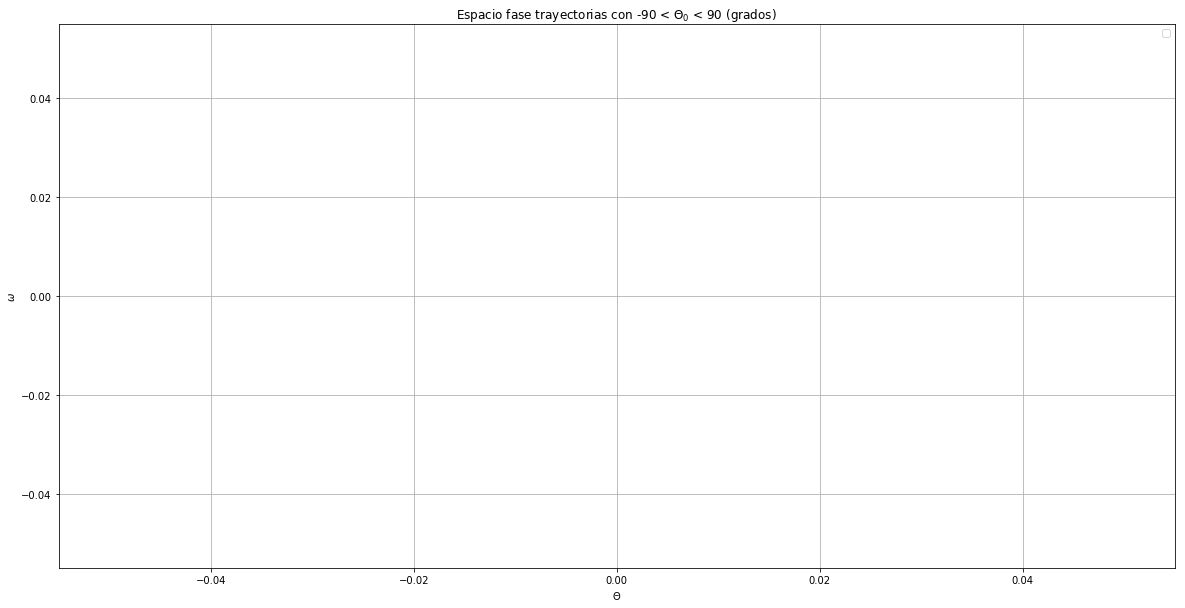

In [60]:
angle = -90

i = np.linspace(0, 50, 5000)
#j = np.linspace(0, 50, 5000)
    
while angle <= 90:
    angle_op = -angle
    ecu_nl = odeint(EDO_NL, vector0(angle), i, args = (w_0,v))
    ecu_nl_op = odeint(EDO_NL, vector0(angle_op), i, args = (w_0,v))
    ecu_lin = odeint(EDO_L, vector0(angle), i, args = (w_0,v))
    plt.plot(ecu_nl[:, 0] + ecu_nl_op[:, 0], ecu_nl[:, 1] + ecu_nl_op[:, 1], 'c')
    angle += 10
    
plt.title('Espacio fase trayectorias con -90 < $\Theta_0$ < 90 (grados)')    
plt.legend(loc='best')
plt.ylabel('$\omega$')
plt.xlabel('$\Theta$')
plt.grid()
plt.show()


## 3.- Ecuación no lineal amortiguada no forzada.

### a) Utiliza un parámetro de amortiguamiento de 0.02, la frecuencia natural unitaria y observa cómo el espacio fase se distorsiona. Compara cada trayectoria del inciso b) del ejercicio anterior con este caso amortiguado.

Al haber amortiguamiento, ahora la ecuación queda de la siguiente manera:
$$\ddot\theta + \mu\dot\theta + \omega_0^2 sin(\theta) = 0 $$
Ahora, pues:
$$ \dot\omega = -\mu \omega - \omega_0^2 sin(\theta) $$
que es lo único que se debe cambiar en el modelado de la EDO.

Se muestra primero el espacio-fase para cada una de las trayectorias (la distorsión de todas las trayectorias simultáneamente):

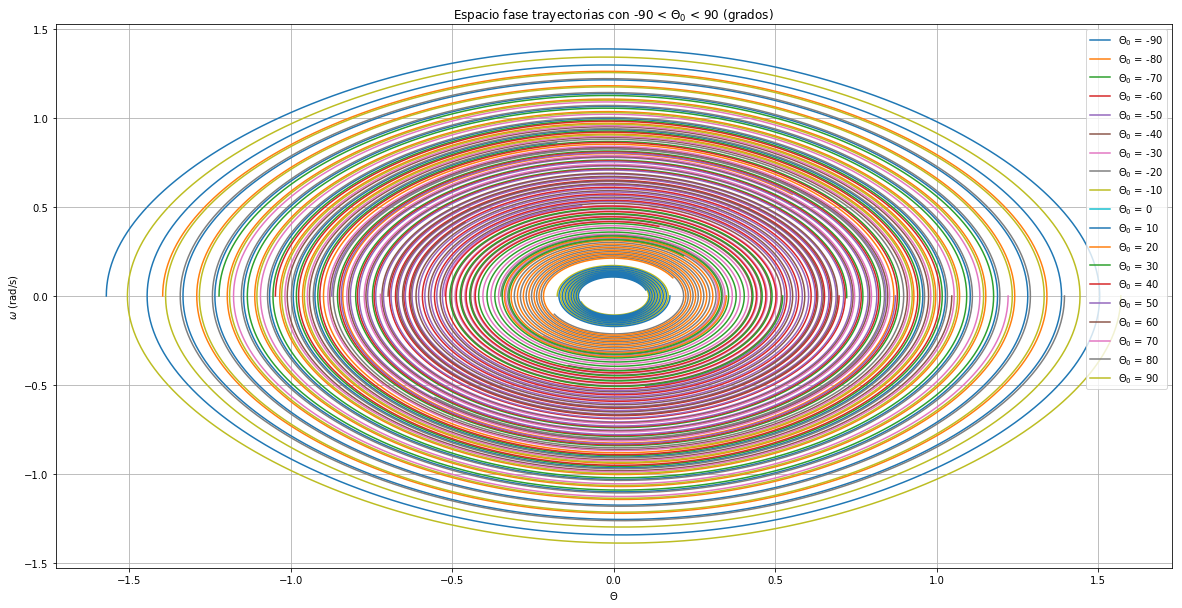

In [57]:
v = 0
w_0 = 1
miu = 0.02

def vector0(angle): 
    return (0, math.radians(angle))

def EDO_NL(vector, t, w_0, v):
    (vel_ang, theta) = vector
    dvectordt = (- math.pow(w_0, 2) * math.sin(theta) - miu * vel_ang , vel_ang)
    return dvectordt

angle = -90

i = np.linspace(0, 50, 5000)
    
while angle <= 90:
    
    ecu_nl = odeint(EDO_NL, vector0(angle), i, args = (w_0,v))
    plt.plot(ecu_nl[:, 1], ecu_nl[:, 0], label='$\Theta_0$ = ' + str(angle))
    angle += 10
    
plt.rcParams['figure.figsize'] = (5, 5)    
plt.title('Espacio fase trayectorias con -90 < $\Theta_0$ < 90 (grados)')    
plt.legend(loc='best')
plt.ylabel('$\omega$ (rad/s)')
plt.xlabel('$\Theta$')
plt.grid()
plt.show()


Ahora, se muestra la distorsión del espacio-fase para cada ángulo distinto:

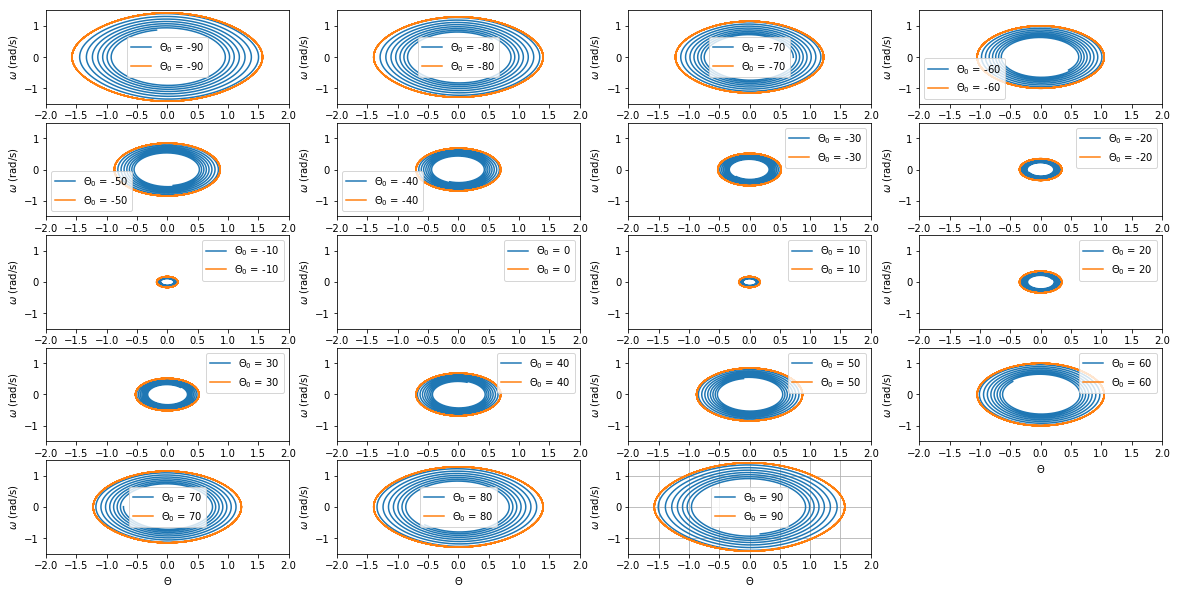

In [59]:
v = 0
w_0 = 1
miu = 0.02

def vector0(angle): 
    return (0, math.radians(angle))

def EDO_NL(vector, t, w_0, v):
    (vel_ang, theta) = vector
    dvectordt = (- math.pow(w_0, 2) * math.sin(theta) - miu * vel_ang , vel_ang)
    return dvectordt

def EDO_NL_NA(vector, t, w_0, v):
    (vel_ang, theta) = vector
    dvectordt = (- math.pow(w_0, 2) * math.sin(theta), vel_ang)
    return dvectordt

angle = -90

i = np.linspace(0, 50, 5000)

j = 1

while angle <= 90:
    
    ecu_nl = odeint(EDO_NL, vector0(angle), i, args = (w_0,v))
    ecu_nl_na = odeint(EDO_NL_NA, vector0(angle), i, args = (w_0,v))
    plt.subplot(5, 4, j)
    plt.plot(ecu_nl[:, 1], ecu_nl[:, 0], ecu_nl_na[:, 1], ecu_nl_na[:, 0], label='$\Theta_0$ = ' + str(angle) )
    plt.ylim(-1.5, 1.5)
    plt.xlim(-2, 2)
    
    plt.rcParams['figure.figsize'] = (20, 10)
    plt.legend(loc='best')
    plt.ylabel('$\omega$ (rad/s)')
    plt.xlabel('$\Theta$')

    j += 1
    angle += 10
    
plt.rcParams['figure.figsize'] = (20, 10)
plt.legend(loc='best')
plt.grid()
plt.show()



Como se observa, el caso con amortiguamiento (señalado en color azul) se acerca el origen coordenado, mientras el no amortiguado se mantiene sobre la misma elipse.

## 4.- Ecuación no lineal completa.

### a) Usando $\mu = 3\pi/2, \quad w = 2\pi, \quad w_0= 3\pi$ , grafica la solución para cinco casos de A alrededor de 1.05. Qué pasa con las soluciones. ¿Qué ocurre si A=2?

Ahora, se tiene la ecuación completa:
$$\ddot\theta + \mu\dot\theta + \omega_0^2 sin(\theta) = A cos(w_dt)$$ 
Utilizando el cambio de variable de los casos anteriores:
$$ \dot\omega = -\mu \omega - \omega_0^2 sin(\theta) + A cos(\omega t) $$
Se observa la solución (tanto de $\theta$ como de $\dot\theta$) para los cinco casos a la par de el que contiene $A = 2$ (señalada en color negro para ser distinguida fácilmente del resto). Lo que espera observarse es que los cinco casos con $A$ similares se encontrarán casi sobrepuestos, mientras que para $A = 2$ la solución discrepa más conforme al resto de los casos. Solución para $\theta$:

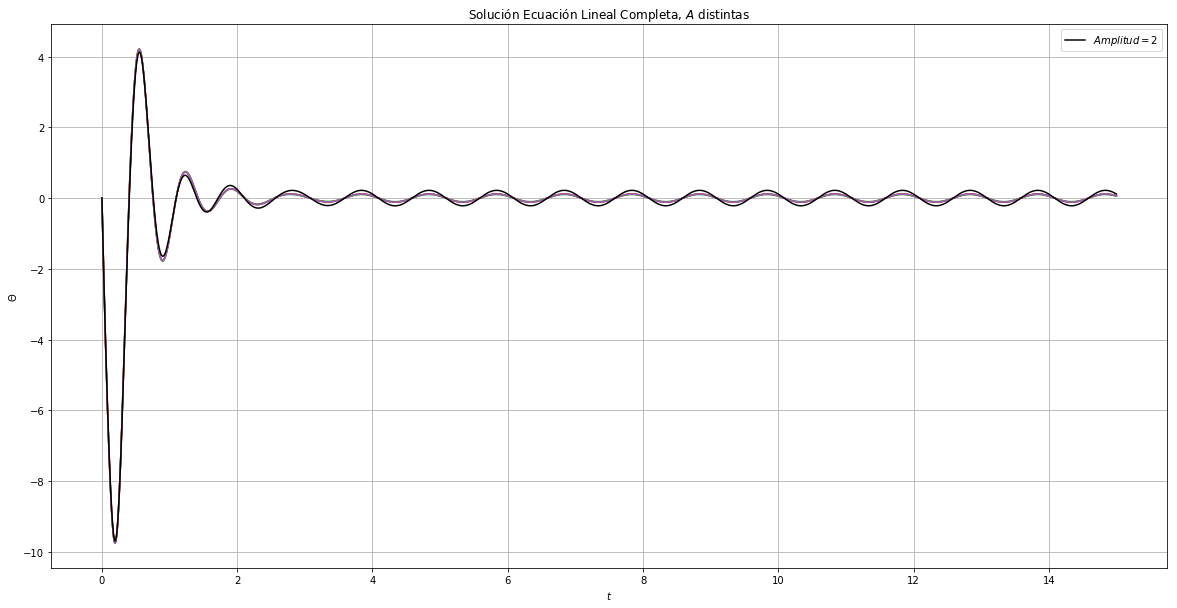

In [61]:
v = 1
w_0 = 3 * math.pi
miu = 3 * math.pi / 2
w = 2 * math.pi

vector0 = (0, math.radians(angle))

def EDO_NL(vector, i, w_0, v):
    (vel_ang, theta) = vector
    dvectordt = (- math.pow(w_0, 2) * math.sin(theta) - miu * vel_ang + v * math.cos(w * i), vel_ang)
    return dvectordt

angle = 10
i = np.linspace(0, 15, 5000)
#j = np.linspace(0, 50, 5000)

ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 1.05))
plt.plot(i, ecu_nl[:, 0])
ecu_lin = odeint(EDO_L, vector0, i, args = (w_0, 1.0))
plt.plot(i, ecu_nl[:, 0])
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 0.92))
plt.plot(i, ecu_nl[:, 0])
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 1.07))
plt.plot(i, ecu_nl[:, 0])
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 1.05))
plt.plot(i, ecu_nl[:, 0])

ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 2))
plt.plot(i, ecu_nl[:, 0], 'k', label='$Amplitud = 2 $')


plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Solución Ecuación Lineal Completa, $A$ distintas')    
plt.legend(loc='best')
plt.ylabel('$\Theta$')
plt.xlabel('$t$')
plt.grid()
plt.show()


Solución para $\dot\theta$:

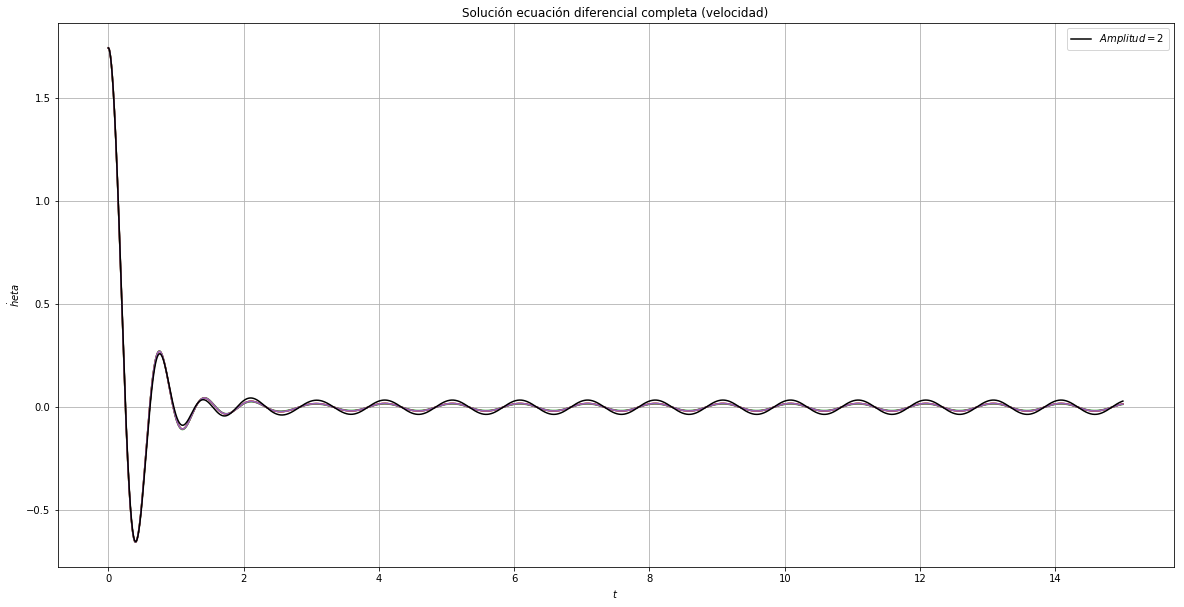

In [62]:
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 1.05))
plt.plot(i, ecu_nl[:, 1])
ecu_lin = odeint(EDO_L, vector0, i, args = (w_0, 1.0))
plt.plot(i, ecu_nl[:, 1])
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 0.92))
plt.plot(i, ecu_nl[:, 1])
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 1.07))
plt.plot(i, ecu_nl[:, 1])
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 1.05))
plt.plot(i, ecu_nl[:, 1])

ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 2))
plt.plot(i, ecu_nl[:, 1], 'k', label='$Amplitud = 2 $')


plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Solución ecuación diferencial completa (velocidad)')    
plt.legend(loc='best')
plt.ylabel('$\dot\theta$')
plt.xlabel('$t$')
#plt.ylim(-2, 2)
#plt.xlim(-2, 2)
    
plt.grid()
plt.show()


### b) Obtén las trayectorias en el espacio fase de los casos del inciso anterior.

Como ya se graficó en los incisos anteriores tanto $\theta$ como su derivada, se muestra ahora el espacio fase a partir de ellos:

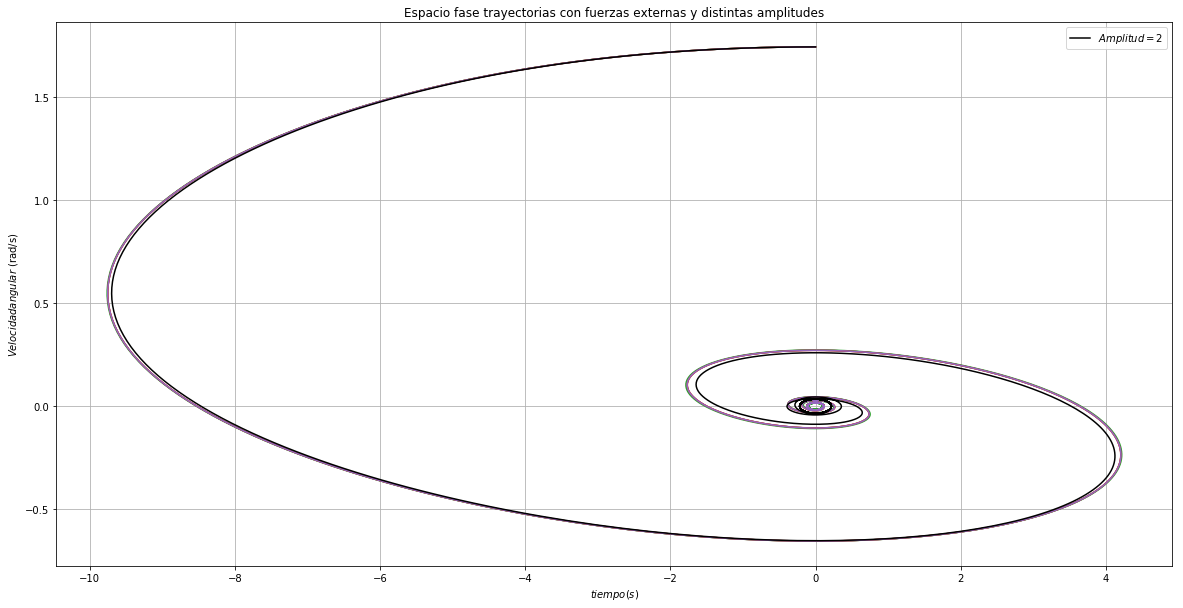

In [63]:
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 1.05))
plt.plot(ecu_nl[:, 0], ecu_nl[:, 1])
ecu_lin = odeint(EDO_L, vector0, i, args = (w_0, 1.0))
plt.plot(ecu_nl[:, 0], ecu_nl[:, 1])
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 0.92))
plt.plot(ecu_nl[:, 0], ecu_nl[:, 1])
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 1.07))
plt.plot(ecu_nl[:, 0], ecu_nl[:, 1])
ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 1.05))
plt.plot(ecu_nl[:, 0], ecu_nl[:, 1])

ecu_nl = odeint(EDO_NL, vector0, i, args = (w_0, 2))
plt.plot(ecu_nl[:, 0], ecu_nl[:, 1], 'k', label='$Amplitud = 2 $')


plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Espacio fase trayectorias con fuerzas externas y distintas amplitudes')    
plt.legend(loc='best')
plt.ylabel('$Velocidad angular$ (rad/s)')
plt.xlabel('$tiempo (s)$')
#plt.ylim(-2, 2)
#plt.xlim(-2, 2)
    
plt.grid()
plt.show()


Efectivamente, en el espacio-fase es también $A$ quien sobresale del resto de trayectorias debido a la diferencia de amplitud.